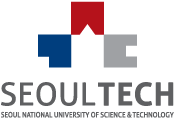

# Lab Session \# 06


---


by Prof. Josué Obregón <br>
Data Analysis for Electronic Manufacturing <br>
Department of Data Science - SeoulTech<br>

## Objective


The objective of this worksheet is to introduce the student to different type of regression and classification techinques. It contains some examples and information about useful libraries that can be used to generate models with linel and non-linear models.


## Importing libraries


The libraries we'll import to start with are pandas and numpy for data handling, and matplotlib, seaborn, and plotly for display generation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Donwnload the files that we will use

In [2]:
!mkdir data

In [3]:
import gdown

urls = ['https://drive.google.com/uc?export=download&id=1Bx9twCUUJi-hNScp2J7XPAulUhjcel8t', # Advertising_data  https://drive.google.com/file/d/1Bx9twCUUJi-hNScp2J7XPAulUhjcel8t/view?usp=sharing
        'https://drive.google.com/uc?export=download&id=1RHeY6rvMeayzjYzACqpjPYzC7F3sKCDA', # Wage_data https://drive.google.com/file/d/1RHeY6rvMeayzjYzACqpjPYzC7F3sKCDA/view?usp=sharing
        ]
outputs = ['Advertising.csv', 'Wage.csv']
for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1Bx9twCUUJi-hNScp2J7XPAulUhjcel8t
To: /content/data/Advertising.csv
100%|██████████| 4.55k/4.55k [00:00<00:00, 7.94MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1RHeY6rvMeayzjYzACqpjPYzC7F3sKCDA
To: /content/data/Wage.csv
100%|██████████| 438k/438k [00:00<00:00, 80.9MB/s]


# Linear Regression


In [6]:
# usecols=[1,2,3,4]
advertising = pd.read_csv('data/Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Plotting a regression line using seaborn. (We cannot get the values of the estimated coefficients)

<Axes: xlabel='TV', ylabel='sales'>

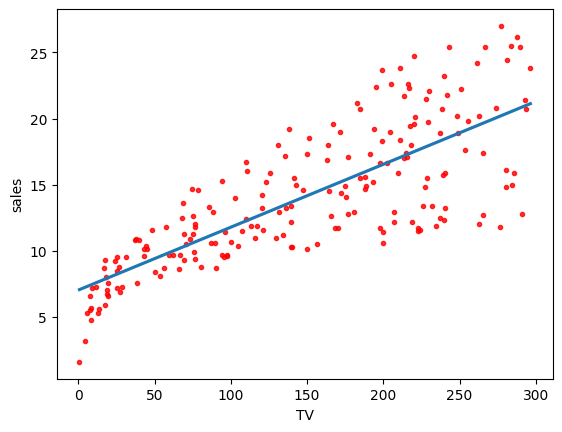

In [30]:
# scatter_kws={'color':'r', 's':9}
sns.regplot(data=advertising, x='TV', y='sales', order=1, ci=None, scatter_kws={'color':'r', 's':9})

<Axes: xlabel='TV', ylabel='sales'>

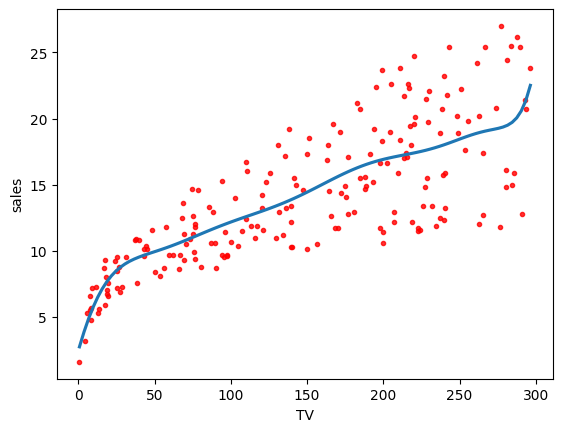

In [13]:
sns.regplot(data=advertising, x='TV', y='sales', order=10, ci=None, scatter_kws={'color':'r', 's':9})

Using sklearn for training a linear regression model

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()

In [17]:
X = advertising[['TV', 'radio', 'newspaper']]
y = advertising['sales']

In [18]:
# ['TV', 'radio', 'newspaper']
lm.fit(X, y)

LinearRegression()

In [19]:
lm.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [24]:
lm.intercept_

2.938889369459412

In [23]:
((y - lm.predict(X))**2).mean()

2.784126314510936

Exercise: Perform the following tasks"

1. Load Wage data
2. Do a quick inspection on Wage data
3. Choose one predictor and plot a regplot against the target variable (make sure to plot the regression line)
4. Train a linear regression model using 'age',	'maritl' and	'race' as predictor variable and 'wage' as response variable.
5. Investigate the coefficients and intercept of your model.

In [45]:
wage = pd.read_csv('data/Wage.csv')
wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 257.9+ KB


In [28]:
wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [36]:
from sklearn.preprocessing import OrdinalEncoder

In [37]:
ord_enc1 = OrdinalEncoder()
ord_enc2 = OrdinalEncoder()

In [39]:
wage['ord_maritl']=ord_enc1.fit_transform(wage[['maritl']])
wage['ord_race']=ord_enc2.fit_transform(wage[['race']])

In [42]:
lm.fit(wage[['age','ord_maritl','ord_race']],wage['wage'])

LinearRegression()

In [43]:
print(lm.coef_)
print(lm.intercept_)

[ 0.69988925  0.26153687 -1.52591816]
82.16015741842465


In [44]:
ord_enc2.categories_

[array(['1. White', '2. Black', '3. Asian', '4. Other'], dtype=object)]

## Logistic Regression

Donwnload the files that we will use

In [46]:
urls = ['https://drive.google.com/uc?export=download&id=1LE4HPyxDcx3-QB-tTPUft8RTlzgybn7k', # Default data  https://drive.google.com/file/d/1LE4HPyxDcx3-QB-tTPUft8RTlzgybn7k/view?usp=sharing
        ]
outputs = ['Default.csv']
for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1LE4HPyxDcx3-QB-tTPUft8RTlzgybn7k
To: /content/data/Default.csv
100%|██████████| 444k/444k [00:00<00:00, 64.7MB/s]


# Default data


In [47]:
default = pd.read_csv('data/Default.csv')
default.head(3)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947


In [49]:
default['default'].unique()

array(['No', 'Yes'], dtype=object)

In [48]:
from sklearn.preprocessing import LabelEncoder

In [50]:
lbl_enc1 = LabelEncoder()
lbl_enc2 = LabelEncoder()

In [51]:
default['default2'] = lbl_enc1.fit_transform(default['default'])
default['student2'] = lbl_enc2.fit_transform(default['student'])
default.head(3)

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0


Let's try linear regression (with a plot)

<Axes: xlabel='balance', ylabel='default2'>

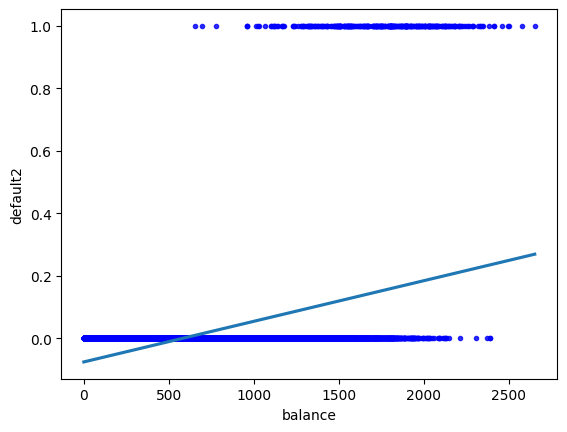

In [53]:
# scatter_kws={'color':'blue', 's':9}
sns.regplot(data=default, x='balance', y='default2', order=1, ci=None, scatter_kws={'color':'blue', 's':9} )

# Logistic Regression

In [54]:
# line_kws={'color':'blue', 'lw':2}
from sklearn.linear_model import LogisticRegression

In [55]:
clf = LogisticRegression()

In [56]:
X = default[['balance','income','student2']]
y = default['default2']

In [57]:
clf.fit(X,y)

LogisticRegression()

In [58]:
print('classes: ', clf.classes_)
print('coefficients: ', clf.coef_)
print('intercept: ', clf.intercept_)

classes:  [0 1]
coefficients:  [[ 4.08201022e-03 -1.33893466e-04 -3.89009045e+00]]
intercept:  [-2.9508496]


## Decision boundaries

In [59]:
from mlxtend.plotting import plot_decision_regions

In [61]:
X_train=default[['balance','income']].values
y_train=default['default2'].values

clf = LogisticRegression(penalty=None)
clf.fit(X_train,y_train)

LogisticRegression(penalty=None)

<Axes: >

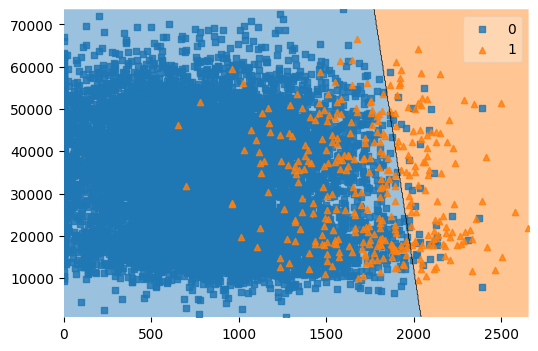

In [62]:
fig = plt.figure(figsize=(6,4))
scatter_kwargs = {'s': 20, 'edgecolor': None, 'alpha': 0.8}
plot_decision_regions(X=X_train, y=y_train, clf=clf, scatter_kwargs=scatter_kwargs)

# *k*-NN *Classifier*

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

<Axes: >

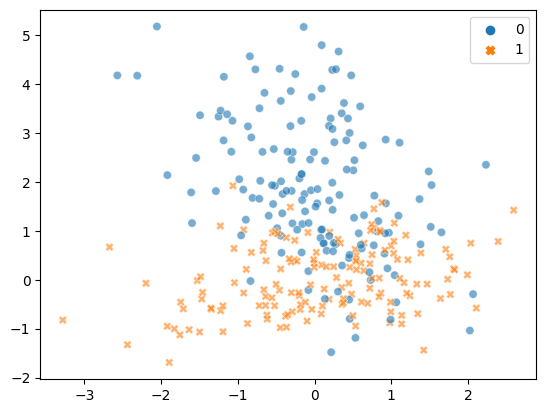

In [65]:
X, y = make_classification(n_samples=300,n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=714)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y, style=y,alpha=0.6)

CPU times: user 3min 42s, sys: 8.35 s, total: 3min 50s
Wall time: 3min 43s


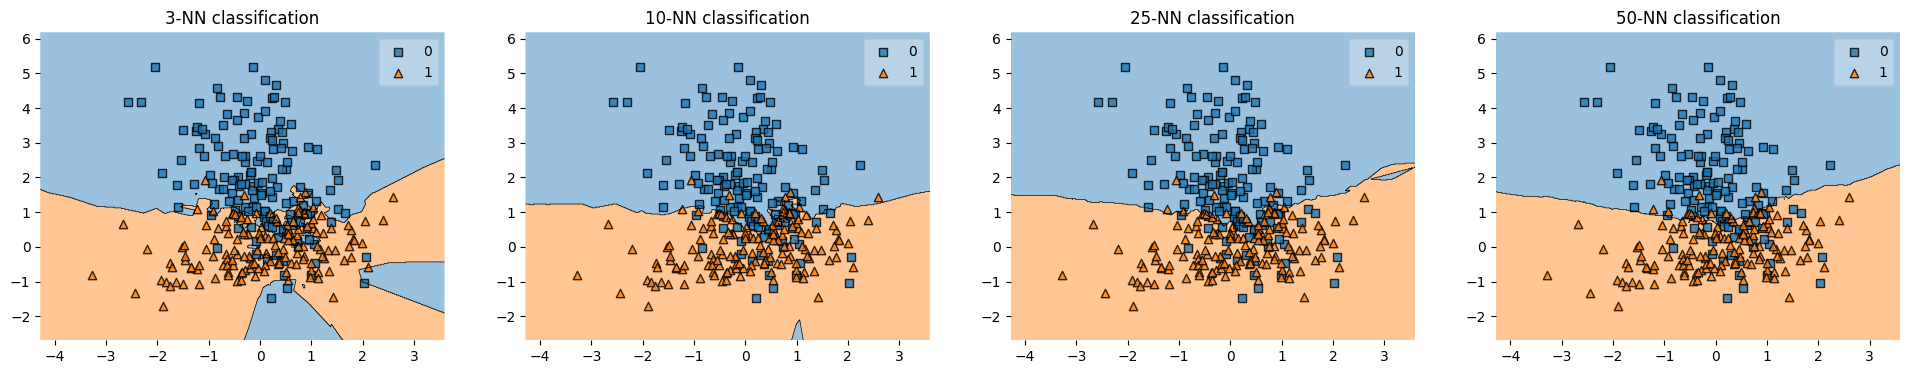

In [67]:
%%time
K=[3,10,25,50]
fig,axes = plt.subplots(ncols=len(K),figsize=(6*len(K),4))
for i, k in enumerate(K):
  # create a KNN classifier
  clf = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
  clf.fit(X,y)

  plot_decision_regions(X=X, y=y, clf=clf, ax=axes[i])
  axes[i].set_title(f'{k}-NN classification')

## Decision Trees


In [68]:
sns.set_style("darkgrid")

Donwnload the files that we will use

In [69]:
urls = ['https://drive.google.com/uc?export=download&id=1G5dtIOtywpDBgREbsf7iDVExz6LVg4DM', # heart  https://drive.google.com/file/d/1G5dtIOtywpDBgREbsf7iDVExz6LVg4DM/view?usp=sharing
        'https://drive.google.com/uc?export=download&id=1ULDuvWPWD3LmxpQ6FKUHe1prjdM8LmSY' # hitters https://drive.google.com/file/d/1ULDuvWPWD3LmxpQ6FKUHe1prjdM8LmSY/view?usp=sharing
        ]
outputs = ['heart.csv','hitters.csv']
for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1G5dtIOtywpDBgREbsf7iDVExz6LVg4DM
To: /content/data/heart.csv
100%|██████████| 19.9k/19.9k [00:00<00:00, 15.5MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1ULDuvWPWD3LmxpQ6FKUHe1prjdM8LmSY
To: /content/data/hitters.csv
100%|██████████| 22.9k/22.9k [00:00<00:00, 34.2MB/s]


## Decision tree for regression

In [ ]:
X= hit[['Years','Hits']]
y = hit['Salary']

## Decision tree for classification

In [ ]:
plot_decision_regions(X[['MaxHR','Age']].values, y, clf=clf2, legend=True)